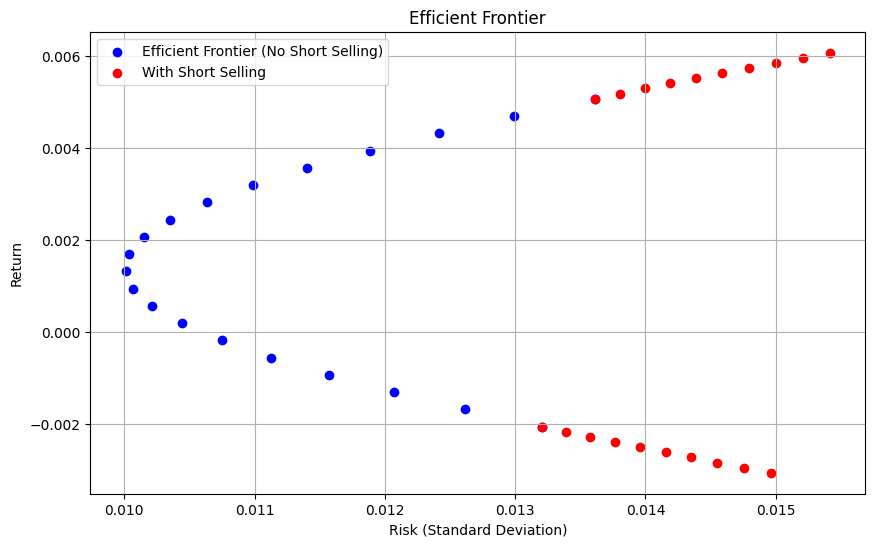

In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load return data from CSV (each column represents an asset)
data = pd.read_csv(r"C:\Users\ADMIN\Desktop\Assignment\New folder\return.csv")
# Compute mean returns and covariance matrix
mu = data.mean().values  # Expected returns
cov_matrix = data.cov().values  # Covariance matrix

# Define variables
num_assets = len(mu)
w = cp.Variable(num_assets)  # Portfolio weights

# Risk aversion parameter (adjustable)
lambda_risk = 0.5  # Controls risk-return tradeoff

# Generate 20 target return values between min and max returns
target_returns = np.linspace(mu.min(), mu.max(), 20)

# Lists to store results
returns = []
risks = []

# Solve optimization problem for each target return
for target_return in target_returns:
    # Portfolio return and risk
    expected_return = mu @ w
    portfolio_variance = cp.quad_form(w, cov_matrix)

    # Objective: Minimize variance with a target return
    objective = cp.Minimize(portfolio_variance)

    # Constraints
    constraints = [
        cp.sum(w) == 1,  # Fully invested portfolio
        expected_return == target_return,  # Target return constraint
    ]

    # Solve the problem
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Store results
    returns.append(expected_return.value)
    risks.append(np.sqrt(portfolio_variance.value))

# Allow short selling for 10 additional points
short_selling_returns_high = np.linspace(mu.min() - 0.001, mu.min(), 10)
short_selling_returns_low = np.linspace(mu.max(), mu.max() + 0.001, 10)
short_selling_returns = np.concatenate((short_selling_returns_high, short_selling_returns_low))
returns_ss = []
risks_ss = []

for target_return in short_selling_returns:
    # Portfolio return and risk
    expected_return = mu @ w
    portfolio_variance = cp.quad_form(w, cov_matrix)

    # Objective: Minimize variance with a target return
    objective = cp.Minimize(portfolio_variance)

    # Constraints (no short-selling constraint removed)
    constraints = [
        cp.sum(w) == 1,  # Fully invested portfolio
        expected_return == target_return  # Target return constraint
    ]

    # Solve the problem
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Store results
    returns_ss.append(expected_return.value)
    risks_ss.append(np.sqrt(portfolio_variance.value))

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(risks, returns, c='blue', label='Efficient Frontier (No Short Selling)')
plt.scatter(risks_ss, returns_ss, c='red', label='With Short Selling')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend()
plt.grid(True)
plt.show()